In [1]:
import pandas as pd


csv_file_path = 'matrices/sampling_runtime.csv'

In [2]:
df =  pd.read_csv(csv_file_path)
df.head()

,k,time_random,time_gm_no_mem,time_gm,time_random_std
0,3,3893.90,3589.17,3854.87,12931.7
1,4,4056.56,3607.43,3861.49,12787.6
2,5,3916.16,3625.85,3851.74,12788.9
3,6,3911.92,3639.82,3857.82,12779.5
4,7,3894.10,3633.54,3849.70,12771.3


In [3]:
import matplotlib.pyplot as plt
import numpy as np


# Selecting columns for the bar plot
columns_of_interest = ["k", "time_random", "time_gm", "time_random_std"]

# rename time_random to random
df = df.rename(columns={"time_random": "xor-hash"})

# rename time_gm to GreedyMini+
df = df.rename(columns={"time_gm": "GM-expected / GM-particular"})


# rename time_random_std to std::hash
df = df.rename(columns={"time_random_std": "std::hash"})

renamed_columns = ["k", "GM-expected / GM-particular", "std::hash", "xor-hash"]

# make all values devided by 1000 on Random and GreedyMini+ columns
df["xor-hash"] = df["xor-hash"] / 1000
df["GM-expected / GM-particular"] = df["GM-expected / GM-particular"] / 1000
df["std::hash"] = df["std::hash"] / 1000

In [4]:
# set 'k' as the index
df.set_index('k', inplace=True)




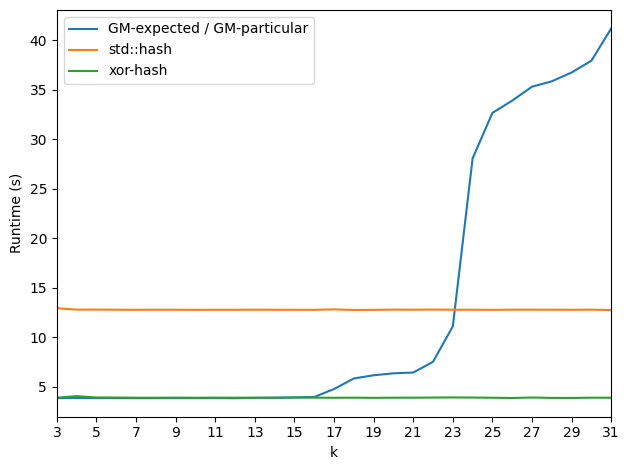

In [5]:
# plot the data as curves
df[renamed_columns[1:]].plot(kind='line')
plt.ylabel('Runtime (s)')
plt.xlabel('k')

# set x range to 3 to 31
plt.xlim(3, 31)


#x ticks start from 1 5 11 15
plt.xticks(np.arange(3, 33, 2))


plt.tight_layout()
plt.savefig('figures/sampling_runtime.pdf')
plt.show()